Author : Sonam Raj

GRIP - THE SPARKS FOUNDATION



Task 6 - Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

Dataset : https://bit.ly/3kXTdox

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Reading and Understanding Dataset

Load the Dataset

The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
80,5.5,2.4,3.8,1.1,1
139,6.9,3.1,5.4,2.1,2
69,5.6,2.5,3.9,1.1,1
84,5.4,3.0,4.5,1.5,1
103,6.3,2.9,5.6,1.8,2


Summary about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.shape

(150, 5)

In [5]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [6]:
X=data.data
y = data.target

#### Splitting Data into Training and Test Sets

The code below puts 70% of the data into a training set and 30% of the data into a test set.

In [7]:
##Train test split
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [9]:
# Build decision tree model
#Use all default parameter

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

In [10]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#### Plotting tree with max_depth=3

In [12]:
dot_data = StringIO()

In [13]:
export_graphviz(dt,out_file=dot_data, filled=True,rounded=True,
              feature_names=data.feature_names,  
                   class_names=data.target_names)

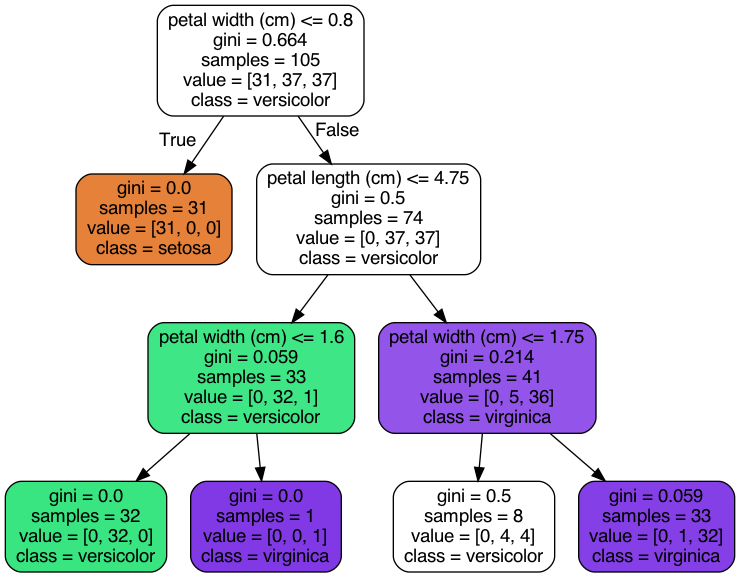

In [14]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
#Evaluate the model performance on the test set

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.9523809523809523


array([[31,  0,  0],
       [ 0, 36,  1],
       [ 0,  4, 33]])

In [17]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test,y_test_pred)

1.0


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [18]:
#Create helper funtion to evaluate the model or create the graph for DT
    
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier,out_file=dot_data, filled=True,rounded=True,
            feature_names=data.feature_names,  
            class_names=data.target_names,)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        
    return graph

In [19]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train Set Performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train,y_train_pred))
    print("-"*50)
    print("Test Set Performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))

In [20]:
evaluate_model(dt)

Train Set Performance
0.9523809523809523
[[31  0  0]
 [ 0 36  1]
 [ 0  4 33]]
--------------------------------------------------
Test Set Performance
1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


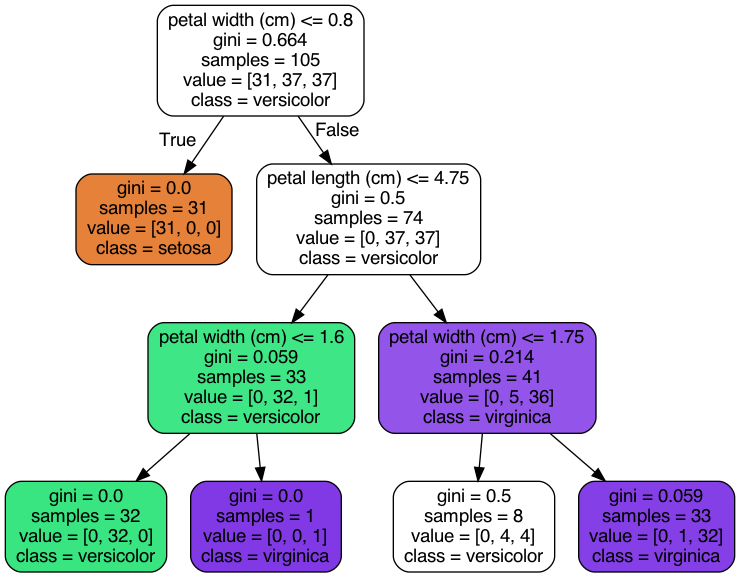

In [21]:
gph = get_dt_graph(dt)
Image(gph.create_png())

In [22]:
# Decision tree without any hyper-parameter setting
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

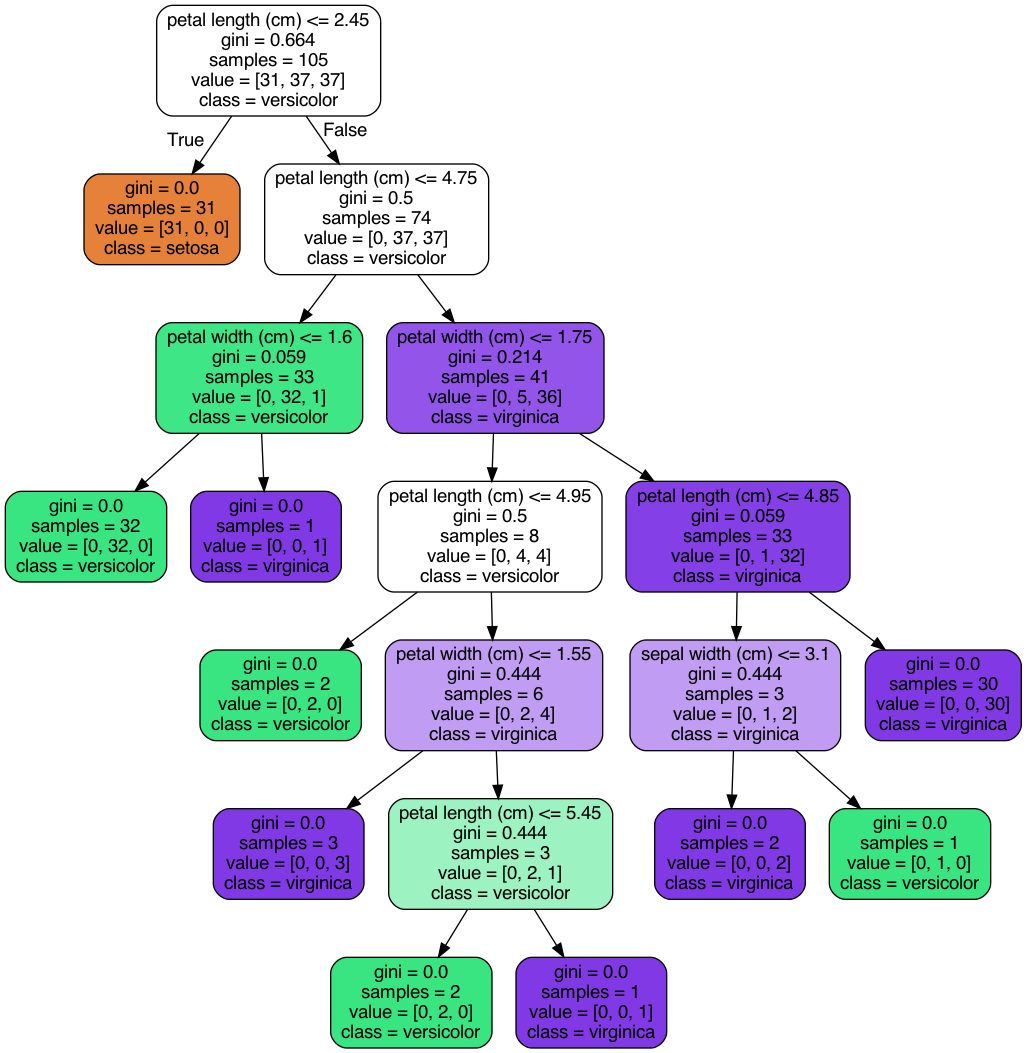

In [23]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [24]:
evaluate_model(dt_default)

Train Set Performance
1.0
[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
--------------------------------------------------
Test Set Performance
1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [25]:
# Controlling depth of tree

dt_depth = DecisionTreeClassifier(max_depth=3 , random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [26]:
evaluate_model(dt_depth)

Train Set Performance
0.9523809523809523
[[31  0  0]
 [ 0 36  1]
 [ 0  4 33]]
--------------------------------------------------
Test Set Performance
1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


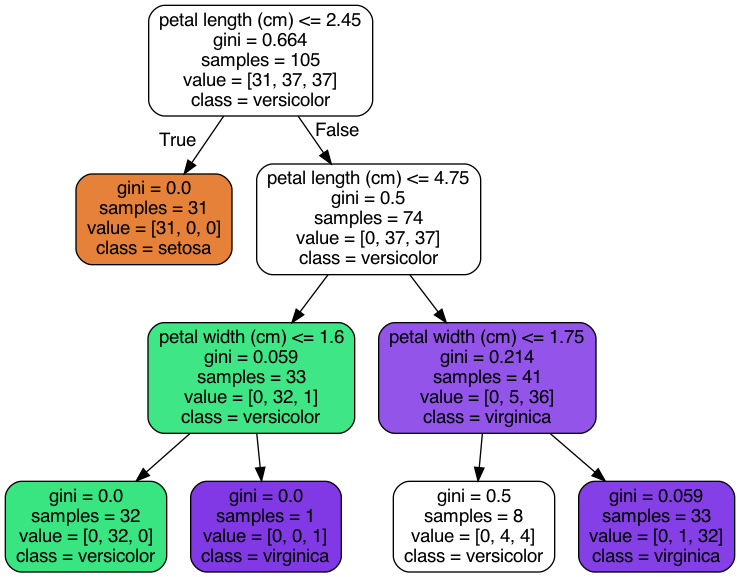

In [27]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [28]:
#Specifying the minimum sample before split

dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state= 42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

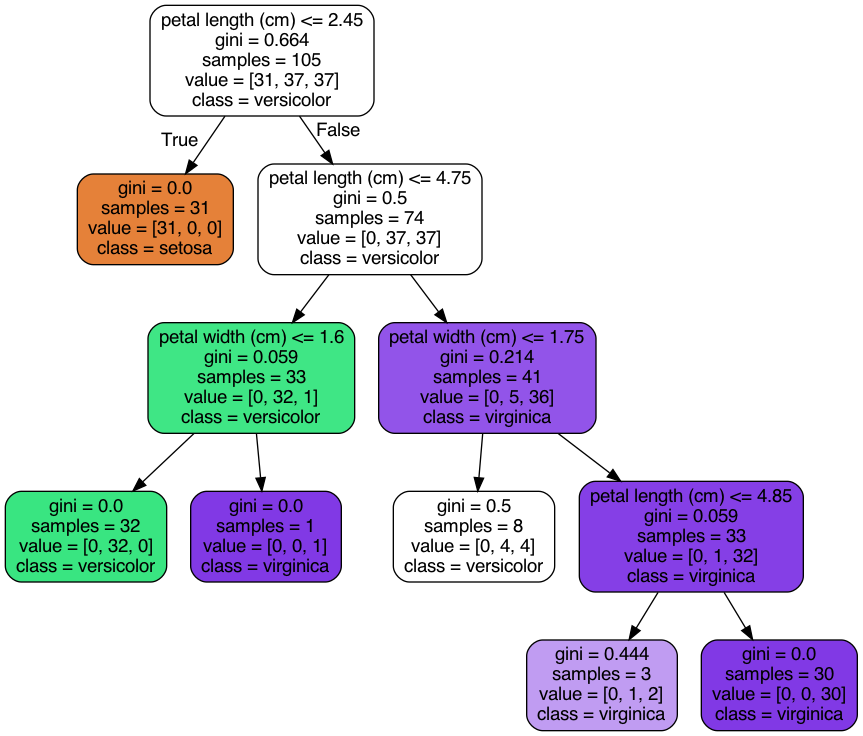

In [29]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [30]:
evaluate_model(dt_min_split)

Train Set Performance
0.9523809523809523
[[31  0  0]
 [ 0 36  1]
 [ 0  4 33]]
--------------------------------------------------
Test Set Performance
1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [31]:
# Specifying the min samples in leaf node
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state= 42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

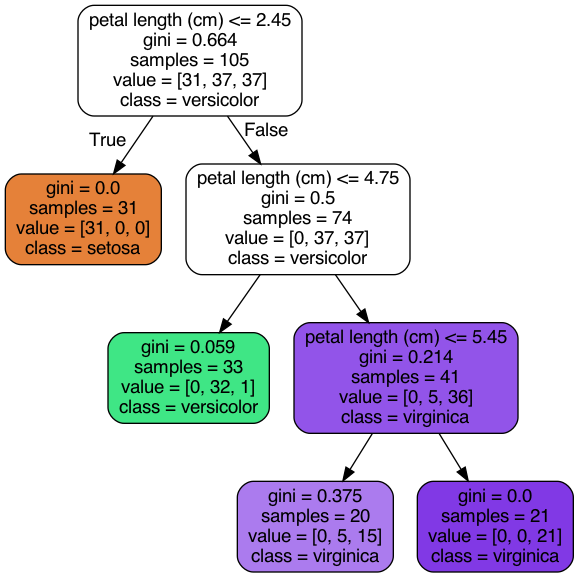

In [32]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [33]:
evaluate_model(dt_min_leaf)

Train Set Performance
0.9428571428571428
[[31  0  0]
 [ 0 32  5]
 [ 0  1 36]]
--------------------------------------------------
Test Set Performance
0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [34]:
# Specifying the min samples in leaf node
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state= 42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

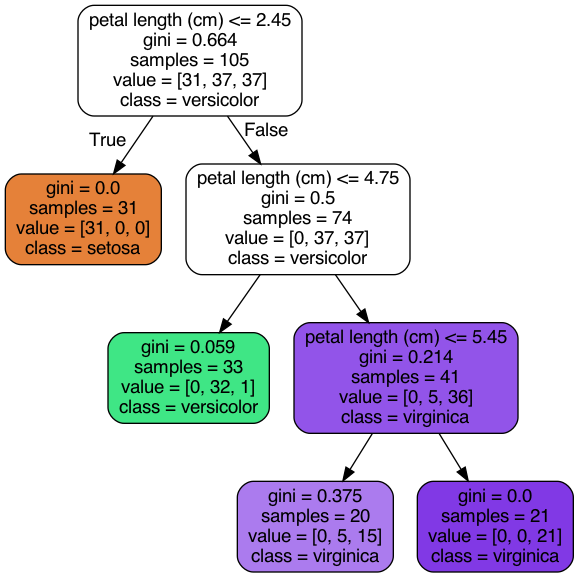

In [35]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [36]:
evaluate_model(dt_min_leaf)

Train Set Performance
0.9428571428571428
[[31  0  0]
 [ 0 32  5]
 [ 0  1 36]]
--------------------------------------------------
Test Set Performance
0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [37]:
# Using entropy instead of Gini
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state= 42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train,y_train)

evaluate_model(dt_min_leaf_entropy)

Train Set Performance
0.9428571428571428
[[31  0  0]
 [ 0 32  5]
 [ 0  1 36]]
--------------------------------------------------
Test Set Performance
0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


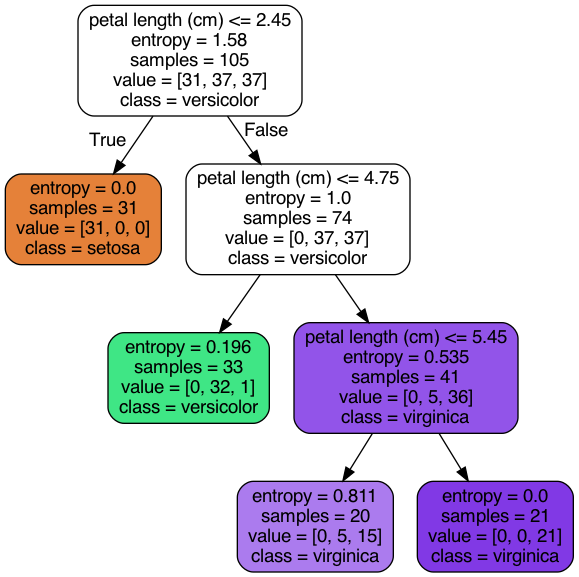

In [38]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [39]:
#Hyper parameter tuning using gridsearchcv
dt = DecisionTreeClassifier(random_state=42)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['gini','entropy']
}

In [42]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv=4,
            n_jobs=-1, verbose=1,
            scoring="accuracy")

In [43]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [44]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001512,0.000052,0.000689,0.000159,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
1,0.001862,0.000289,0.000638,0.000062,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
2,0.001420,0.000245,0.000612,0.000139,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
3,0.001896,0.001309,0.000534,0.000055,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,31
4,0.002323,0.002126,0.000542,0.000109,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,31
5,0.001168,0.000067,0.000476,0.000011,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,4
6,0.001089,0.000020,0.000462,0.000010,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
7,0.001172,0.000203,0.000582,0.000142,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
8,0.001474,0.000586,0.000528,0.000066,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,31
9,0.001150,0.000109,0.000997,0.000834,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,31


In [45]:
cv_df.shape

(50, 15)

In [46]:
cv_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
35,0.001060,0.000017,0.000694,0.000328,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
40,0.000920,0.000139,0.000388,0.000085,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
45,0.000986,0.000107,0.000453,0.000075,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
5,0.001168,0.000067,0.000476,0.000011,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,4
10,0.001198,0.000027,0.000808,0.000468,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,4


In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [48]:
grid_search.best_score_

0.9042022792022792

In [49]:
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Train Set Performance
0.9619047619047619
[[31  0  0]
 [ 0 36  1]
 [ 0  3 34]]
--------------------------------------------------
Test Set Performance
1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


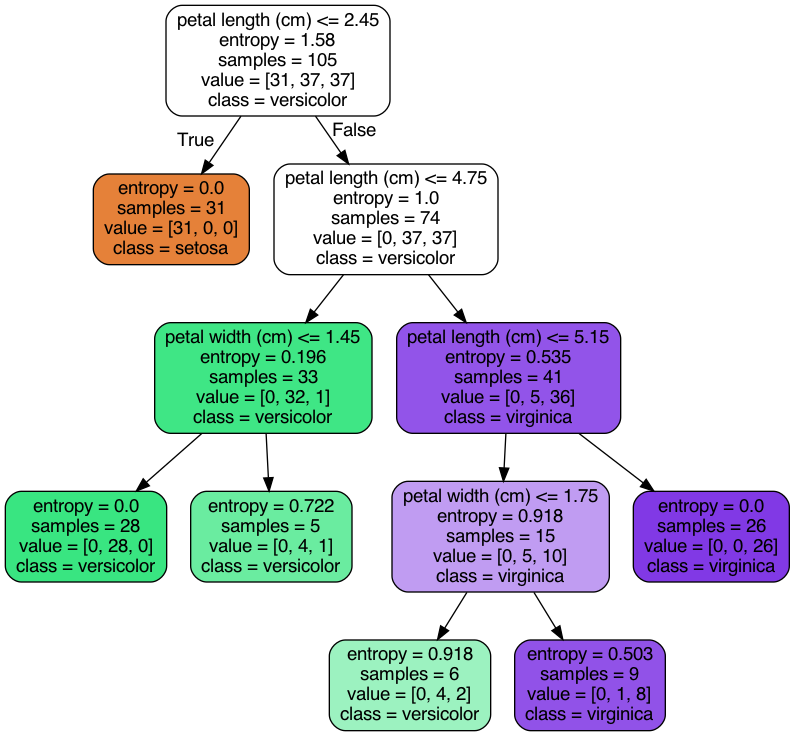

In [50]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())